<a href="https://colab.research.google.com/github/TMikeM/PRUEBAS-PARA-EL-PROYECTO-FINAL/blob/main/grafoProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
---------------- NOMENCLATURA DE LOS EDIFICIOS: -------------------------|
- EN: Entrada de la 27         | - FINGF: Facultad de Fisicomecanicas
- CH: Ciencias Humanas         | - DI: Diseño industrial
- IM: Ingenieria Mecanica      | - CEIM:              
- CT: Camilo Torres            | - CAYFAV: CapriuisyFavuis
- CEN: Centic                  | - LABAT: Laboratorio de alta tension
- FDC : Facultad de Ciencias   | - LABDI: Laboratorio de diseli undustrial
- IE: Ingenieria Electrica     | - LABHI: Laboratorio de Hidraulica
- II: Ingenieria Industrial    | - PDA: Planta de Aceros
- IL: Instituto de Lenguas     | - JBV: Jorge Bautista V
- IQ: Ingenieria Quimica       | - DACA: Daniel Casas
- AMM: Aula Maxima de Mecanica | - AMF: Aula Maxima de Fisica
-E3T: Electrica Electronica y Telecomunicaciones 

'''

In [ ]:
''' El programa podría presentar tres servicios: (NO OFICIAL OJO)
>>> Consulta de una ruta en específico (Listo)
>>> Consulta de rutas según el horario (El funcionamiento principal de nuestro programa, por días, hasta donde tengo entendido...)
>>> Consulta de rutas según el horario (Un funcionamiento extra, rutas individuales en un día en específico del horario)
'''

# ❗ Importar librerías y archivos para que el programa funcione

In [1]:
#Nuestras librerías
import networkx as nx #Para los grafos
import pandas as pd #Para leer los archivos de excel
import matplotlib.pyplot as plt #Para las gráficas

## 🏢 Para la red de edificios e intersecciones

In [ ]:
#Esto nos ayuda a cargar el archivo de excel para convertir a csv
from google.colab import files
files.upload()

In [3]:
#Convirtiendo el archivo excel a data Frame
df = pd.read_excel("grafo.xlsx", index_col=None)

In [4]:
df.head()

,Origen,Destino,Peso
0,EN,I0,180
1,IL,I0,85
2,IL,I1,121
3,AMM,I1,17
4,IM,I1,25


In [5]:
#Esto es para construir nuestro grafo, que se llama G
G = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Peso')

## ⏱ Para los horarios

In [ ]:
#Esto nos ayuda a cargar el archivo de excel para convertir a csv
from google.colab import files
files.upload()

In [ ]:
#Convirtiendo el archivo excel a data Frame
dh = pd.read_excel("Hor.xlsx", index_col=None)

In [ ]:
dh.head()

,Entrada,Salida
0,EN,IL
1,IL,CT
2,CT,CEN


# ✨ Gráficas


## ⭐ Gráfica general del mapa de la UIS.

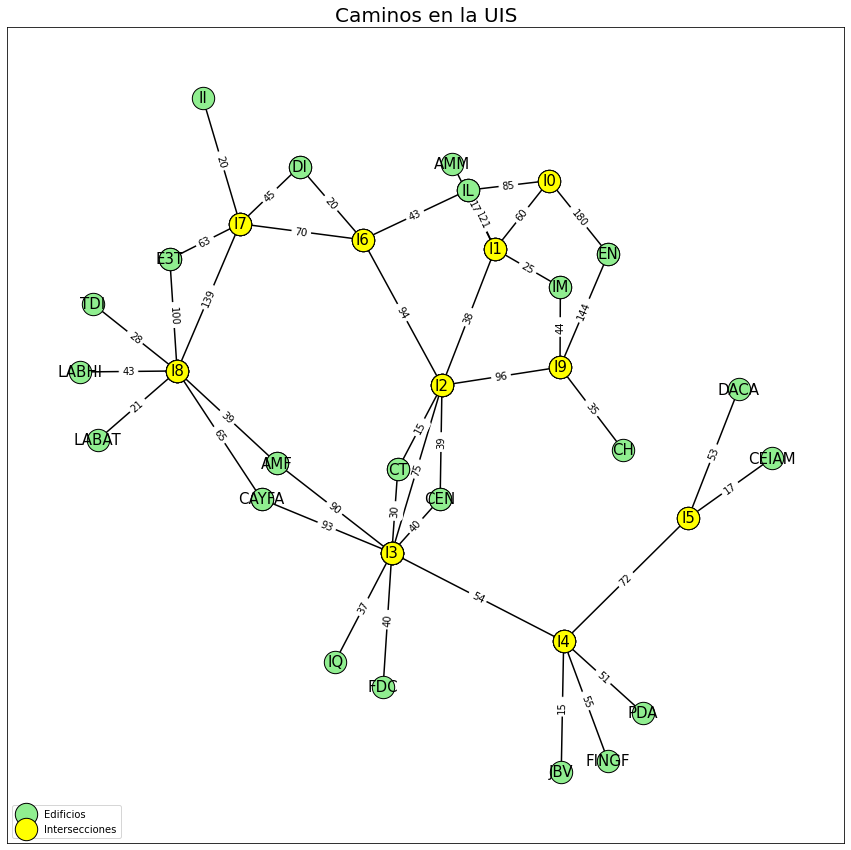

In [22]:
#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(15, 15)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)

#Configuración para los nodos
edif = list(df.Origen)   #Toma del dataframe solo la columna de origen
inter = list(df.Destino) #Toma del dataframe solo la columna de destino

nx.draw_networkx_nodes(G, pos, nodelist=edif, node_size=500, edgecolors='Black', node_color='lightgreen', label = 'Edificios' ) 
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_size=500, edgecolors='Black', node_color='yellow', label = 'Intersecciones')

#Configuración para las aristas
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1.5)
weight_labels = nx.get_edge_attributes(G,'peso')
labels = {e: G.edges[e]['Peso'] for e in G.edges} #Guarda los pesos entre cada arista
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

#Configuración de las etiquetas
nx.draw_networkx_labels(G, pos, font_size=15)
plt.legend(loc="lower left")
plt.title("Caminos en la UIS", fontsize=20)
plt.axis('on')
plt.show()

## ⭐ Consulta de una ruta especifica
Permite al usuario consultar una ruta externa a su horario.

Escribe las inciales de los edificos en ***Mayuscula***
Ingresa las iniciales del edificio de Inicio: EN
Ingresa las iniciales del edificio de Destino: LABAT


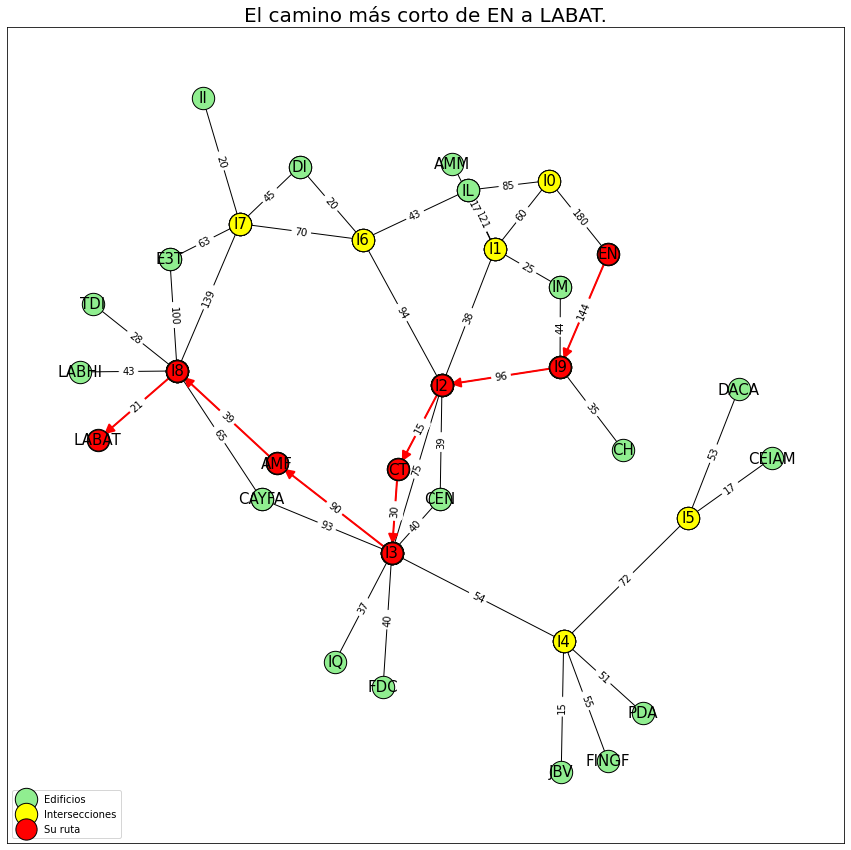

Usted recorrera en total: 8 puntos.
La distancia en metros es 435


In [41]:
print("Escribe las inciales de los edificos en ***Mayuscula***")
Entrada= input("Ingresa las iniciales del edificio de Inicio: ")
Salida= input("Ingresa las iniciales del edificio de Destino: ")

#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(15, 15)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)

#Configuración para los nodos
inter = list(df.Destino)
edif = list(df.Origen)

nx.draw_networkx_nodes(G, pos, nodelist=edif, node_size=500, edgecolors = 'black', node_color='lightgreen', label='Edificios') #Para los edificios
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_size=500, edgecolors = 'black', node_color='yellow', label='Intersecciones') #Para las intersecciones

#Configuración para las aristas
labels = {e: G.edges[e]['Peso'] for e in G.edges} #Guarda los pesos entre cada arista
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1)

#Configuración para colorear el camino más corto (LO QUE ESTÁ EN ROJO)
path = nx.shortest_path(G,source=Entrada,target=Salida, weight='Peso', method='dijkstra')
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path, node_size=450, edgecolors='black', node_color='red', label = 'Su ruta')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)

#Configuración para las etiquetas de la gráfica
nx.draw_networkx_labels(G, pos, font_size=15)

plt.legend(loc="lower left")
plt.title(f"El camino más corto de {Entrada} a {Salida}.", fontdict={'fontsize':20})
plt.axis('on')
plt.savefig('Mapa_UIS.png', dpi = 300, format = 'png', transparent = True)
plt.show()

#En esta impresion a pantalla mostramos la cantidad total de puntos por lo que el usuario recorre y la distancia total en metros.
print(f"Usted recorrera en total: {len(path)} puntos.\nLa distancia en metros es {nx.shortest_path_length(G, 'EN', 'LABAT', 'Peso')}")

## ⭐ Consulta de rutas de la semana según el horario
Solo disponible para rutas manuales y falta corregir el nombre de los nodos

In [42]:
#Listas de caminos de prueba
path = nx.shortest_path(G,source='EN',target='LABAT', weight='Peso', method='dijkstra')
path_edges = list(zip(path,path[1:]))

path2 = nx.shortest_path(G,source='CT',target='E3T', weight='Peso', method='dijkstra')
path_edges2 = list(zip(path2,path2[1:]))

path3 = nx.shortest_path(G,source='DACA',target='EN', weight='Peso', method='dijkstra')
path_edges3 = list(zip(path3,path3[1:]))

path4 = nx.shortest_path(G,source='CT',target='CEN', weight='Peso', method='dijkstra')
path_edges4 = list(zip(path4,path4[1:]))

path5 = nx.shortest_path(G,source='II',target='FDC', weight='Peso', method='dijkstra')
path_edges5 = list(zip(path5,path5[1:]))

path6 = nx.shortest_path(G,source='LABAT',target='EN', weight='Peso', method='dijkstra')
path_edges6 = list(zip(path6,path6[1:]))

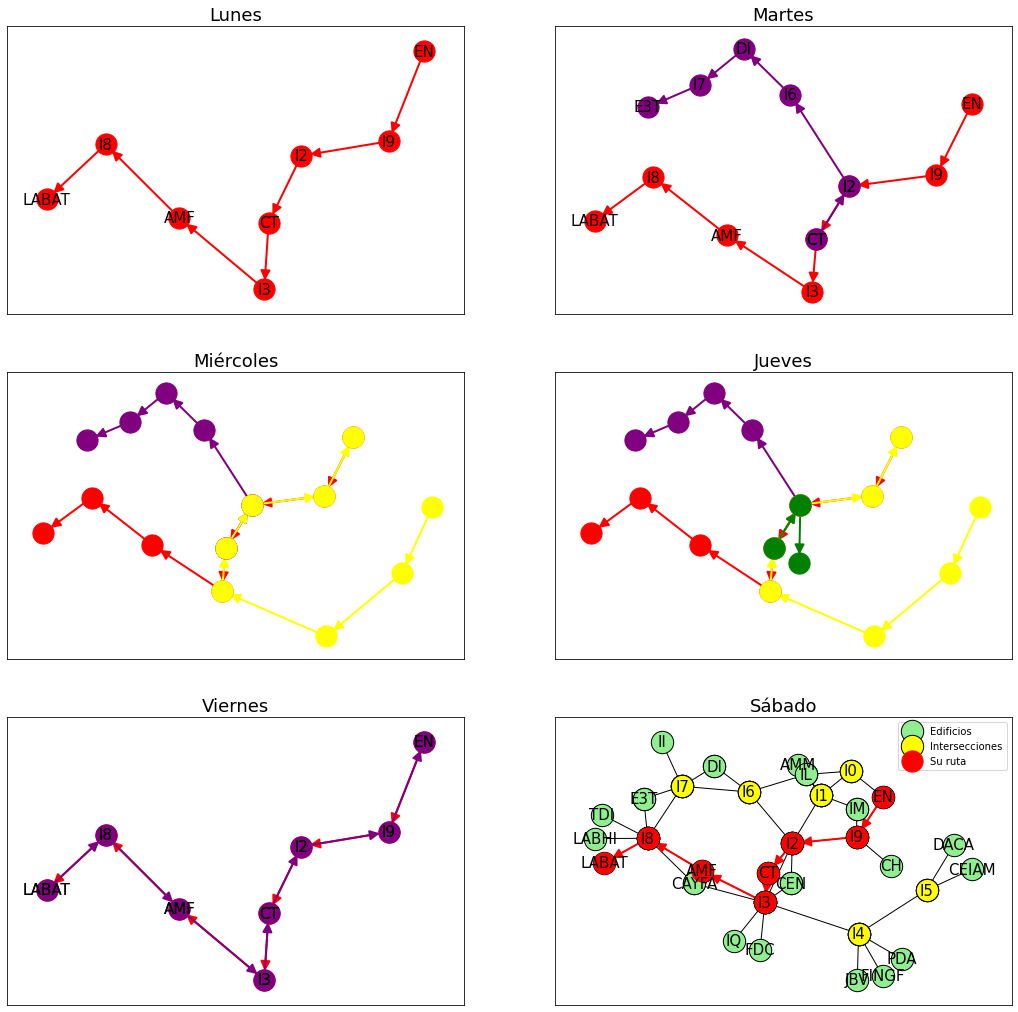

In [43]:
#Graficando el grafo por sub plots
#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(18, 18)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)


#-----------------------------------------------------------------------------------------------------------------------------------
# Subplot LUNES
# plt.subplot(Filas, Columnas, posición)
plt.subplot(3, 2, 1)
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
node_labels = dict(zip(path, path)) #Para que aparezca solo los nombres de los nodos que necesito en el camino
nx.draw_networkx_labels(G, pos, font_size=15, labels=node_labels)
plt.title('Lunes', fontsize=18)

#-----------------------------------------------------------------------------------------------------------------------------------
# Subplot MARTES
plt.subplot(3, 2, 2)
#Dos rutas en una gráfica, primera ruta
nx.draw_networkx_nodes(G,pos, label=True, nodelist=path, node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
node_labels = dict(zip(path, path)) #Para que aparezca solo los nombres de los nodos que necesito en el camino
nx.draw_networkx_labels(G, pos, font_size=15, labels=node_labels)
#Dos rutas en una gráfica, segunda ruta
nx.draw_networkx_nodes(G,pos, nodelist=path2, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges2,  edge_color='purple', width=2)
node_labels2 = dict(zip(path2, path2)) #Para que aparezca solo los nombres de los nodos que necesito en el camino
nx.draw_networkx_labels(G, pos, font_size=15, labels=node_labels2)
plt.title('Martes', fontsize=18)

#-----------------------------------------------------------------------------------------------------------------------------------
# Subplot MIÉRCOLES
plt.subplot(3, 2, 3)
#Tres rutas en una gráfica, primera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
#Tres rutas en una gráfica, segunda ruta
nx.draw_networkx_nodes(G,pos, nodelist=path2, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges2,  edge_color='purple', width=2)
#Tres rutas en una gráfica, tercera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path3, label = 'True', node_size=450, node_color='yellow')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges3,  edge_color='yellow', width=2)
plt.title('Miércoles', fontsize=18)

#-----------------------------------------------------------------------------------------------------------------------------------
# Subplot JUEVES
plt.subplot(3, 2, 4)
#Cuatro rutas en una gráfica, primera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
#Cuatro rutas en una gráfica, segunda ruta
nx.draw_networkx_nodes(G,pos, nodelist=path2, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges2,  edge_color='purple', width=2)
#Cuatro rutas en una gráfica, tercera ruta
nx.draw_networkx_nodes(G,pos, nodelist=path3, label = 'True', node_size=450, node_color='yellow')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges3,  edge_color='yellow', width=2)
#Tres rutas en una gráfica, cuarta ruta
nx.draw_networkx_nodes(G,pos, nodelist=path4, label = 'True', node_size=450, node_color='green')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges4,  edge_color='green', width=2)
plt.title('Jueves', fontsize=18)

#-----------------------------------------------------------------------------------------------------------------------------------
# Subplot VIERNES
plt.subplot(3, 2, 5)
#OJO con esta ruta, es EN->LABAT, LABAT->EN 
#Y qué pasa si repite ruta en el día? Eso veremos...
nx.draw_networkx_nodes(G,pos, nodelist=path, label = 'True', node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
node_labels = dict(zip(path, path)) #Para que aparezca solo los nombres de los nodos que necesito en el camino
nx.draw_networkx_labels(G, pos, font_size=15, labels=node_labels)
nx.draw_networkx_nodes(G,pos, nodelist=path6, label = 'True', node_size=450, node_color='purple')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges6,  edge_color='purple', width=2)
node_labels6 = dict(zip(path6, path6)) #Para que aparezca solo los nombres de los nodos que necesito en el camino
nx.draw_networkx_labels(G, pos, font_size=15, labels=node_labels6)
plt.title('Viernes', fontsize=18)


#-----------------------------------------------------------------------------------------------------------------------------------
# Subplot SÁBADO (tristemente)
plt.subplot(3, 2, 6)
#Todo el mapa
nx.draw_networkx_nodes(G, pos, nodelist=edif, node_size=500, edgecolors = 'black', node_color='lightgreen', label = 'Edificios')
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_size=500, edgecolors = 'black', node_color='yellow', label = 'Intersecciones')
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1)
nx.draw_networkx_nodes(G,pos, label='Su ruta', nodelist=path, node_size=450, node_color='red')
nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=path_edges,  edge_color='red', width=2)
nx.draw_networkx_labels(G, pos, font_size=15)
plt.legend()
plt.title('Sábado', fontsize=18)

plt.axis('on')
plt.savefig('Mapa_UIS.png', dpi = 300, format = 'png', transparent = True)
plt.show()

# Espacio de pruebas

In [ ]:
#Como la librería entiende los datos de nuestro grafo
#Nodos del Grafo
print(f"Los nodos del grafo son: \n{G.nodes()}")

#Aristas del Grafo 
print(f"Las aristas del grafo son:\n{G.edges()}")

#Grado del Grafo 
print(f"El grado del grafo es: \n{G.order()}")

Los nodos del grafo son: 
['EN', 'I0', 'IL', 'I1', 'AMM', 'IM', 'CT', 'I2', 'CEN', 'I3', 'FDC', 'IQ', 'AMF', 'CAYFA', 'JBV', 'I4', 'PDA', 'FINGF', 'DACA', 'I5', 'CEIAM', 'I6', 'DI', 'I7', 'II', 'E3T', 'I8', 'LABAT', 'LABHI', 'TDI', 'I9', 'CH']
Las aristas del grafo son:
[('EN', 'I0'), ('EN', 'I9'), ('I0', 'IL'), ('I0', 'I1'), ('IL', 'I1'), ('IL', 'I6'), ('I1', 'AMM'), ('I1', 'IM'), ('I1', 'I2'), ('IM', 'I9'), ('CT', 'I2'), ('CT', 'I3'), ('I2', 'CEN'), ('I2', 'I6'), ('I2', 'I9'), ('I2', 'I3'), ('CEN', 'I3'), ('I3', 'FDC'), ('I3', 'IQ'), ('I3', 'AMF'), ('I3', 'CAYFA'), ('I3', 'I4'), ('AMF', 'I8'), ('CAYFA', 'I8'), ('JBV', 'I4'), ('I4', 'PDA'), ('I4', 'FINGF'), ('I4', 'I5'), ('DACA', 'I5'), ('I5', 'CEIAM'), ('I6', 'DI'), ('I6', 'I7'), ('DI', 'I7'), ('I7', 'II'), ('I7', 'E3T'), ('I7', 'I8'), ('E3T', 'I8'), ('I8', 'LABAT'), ('I8', 'LABHI'), ('I8', 'TDI'), ('I9', 'CH')]
El grado del grafo es: 
32


In [ ]:
#Se realiza una prueba utilizando el algoritmo de Dijsktra
djk_path= nx.dijkstra_path(G, source='EN', target='LABAT', weight='Peso')
djk_path

['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']

In [ ]:
djk_path= nx.dijkstra_path(G, source= 'EN', target= 'LABAT', weight='Peso')
djk_path_edges = list(zip(djk_path,djk_path[1:]))
#Para convertir este algoritmo en camino

In [ ]:
'''
EN ESTA EXTENSION NO TOMA AL NODO DEL CAMILO TORRES PARA PASAR POR EL CAMINO HACIA LABAT
EN CAMBIO, EN EL ALGORITMO DE ARRIBA TOMA EL CAMINO PASANDO POR EL CT , Y EN VERDA
ME PARECE MEJOR EL SEGUNDO PERO DEBEMOS REALIZAR LA PRUEBA EN LA QUE QUEDAMOS DE ACUERDO.

Actualizacion 2/3/22 Ya fue corregido, ahora ambas funcionan de la misma manera y calculan de la misma manera. 
'''
djk_path= nx.dijkstra_path(G, source= x, target= y, weight='Peso') #ESTE ES EL ALGORITMO QUE TOMA EL CAMILO TORRES
print(f"Camino con nx.dijkstra_path: {djk_path}")
pathD = nx.shortest_path(G,source='EN',target='LABAT', weight='Peso')#ESTE EL ALGORITMO QUE NO TOMA EL CAMILO TORRES ES DECIR DE UNA VEZ PASA A LA INTERSECCION SIGUIENTE.
print(f"Camino con nx.shortest_path sin method: {pathD}")
pathE = nx.shortest_path(G,source='EN',target='LABAT', weight='Peso', method='dijkstra')#ESTE EL ALGORITMO QUE NO TOMA EL CAMILO TORRES ES DECIR DE UNA VEZ PASA A LA INTERSECCION SIGUIENTE.
print(f"Camino con nx.shortest_path con method: {pathE}")



Camino con nx.dijkstra_path: ['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']
Camino con nx.shortest_path sin method: ['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']
Camino con nx.shortest_path con method: ['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']


In [ ]:
#En esta impresion a pantalla mostramos la cantidad total de puntos por lo que el usuario recorre y la distancia total en metros.
print(f"Utd recorrera en total: {len(djk_path)} puntos.\n La distancia en metros es {nx.dijkstra_path_length(G, 'EN', 'LABAT', 'Peso')}")

Utd recorrera en total: 8 puntos.
 La distancia en metros es 435


In [ ]:
#Este archivo nos  ayuda a exportar el grafo graficado 
#mas arriba a un archivo modificable en ghepi y asi realizar mas "Bonito el grafo"
nx.write_gexf(G,'grafo.gexf',version='1.2draft')